In [113]:
#pip install pycountry 
#pip install geopandas
#pip install mapclassify

In [115]:
import pandas as pd
import matplotlib.pyplot as plt

In [116]:
import pycountry 
import geopandas 

In [245]:
path = '/Users/LuanVitor/Documents/Estudos e Profissional/Computing/Data Visualization/USA Map/'
geo_usa = geopandas.read_file(path+'cb_2018_us_state_20m')

In [25]:
panel = pd.read_excel('treated_data/Panel/panel_final.xlsx').drop('Unnamed: 0', axis = 1)

In [241]:
df_state_loc = pd.read_csv('Data_Treatment/treated_data/States/states_loc.csv',sep=';').drop('Unnamed: 0', axis=1)

In [242]:
df_tool = panel.where((panel.Year==2009) | (panel.Year==2020)).dropna()
prod_states = df_tool.groupby(['Year','State']).sum()['Production_GWh']
df_tool2 = prod_states.reset_index().set_index('State').groupby('State').pct_change().reset_index()
df_tool2['Variation_%'] = df_tool2.Production_GWh.fillna(0)*100

df_tool2['Variation'] = df_tool2['Variation_%']
df_tool2['NAME'] = df_tool2['State'].apply(lambda x: abbrev_to_us_state[x])
df_tool3 = df_tool2.drop(['Year','Production_GWh','State','Variation_%'],axis=1)
df_tool3['Variation'] = df_tool3['Variation'].apply(lambda x: int(-x))

In [243]:
df_merge = df_tool3.join(df_state_loc.set_index('NAME'), on = 'NAME', how = 'left')

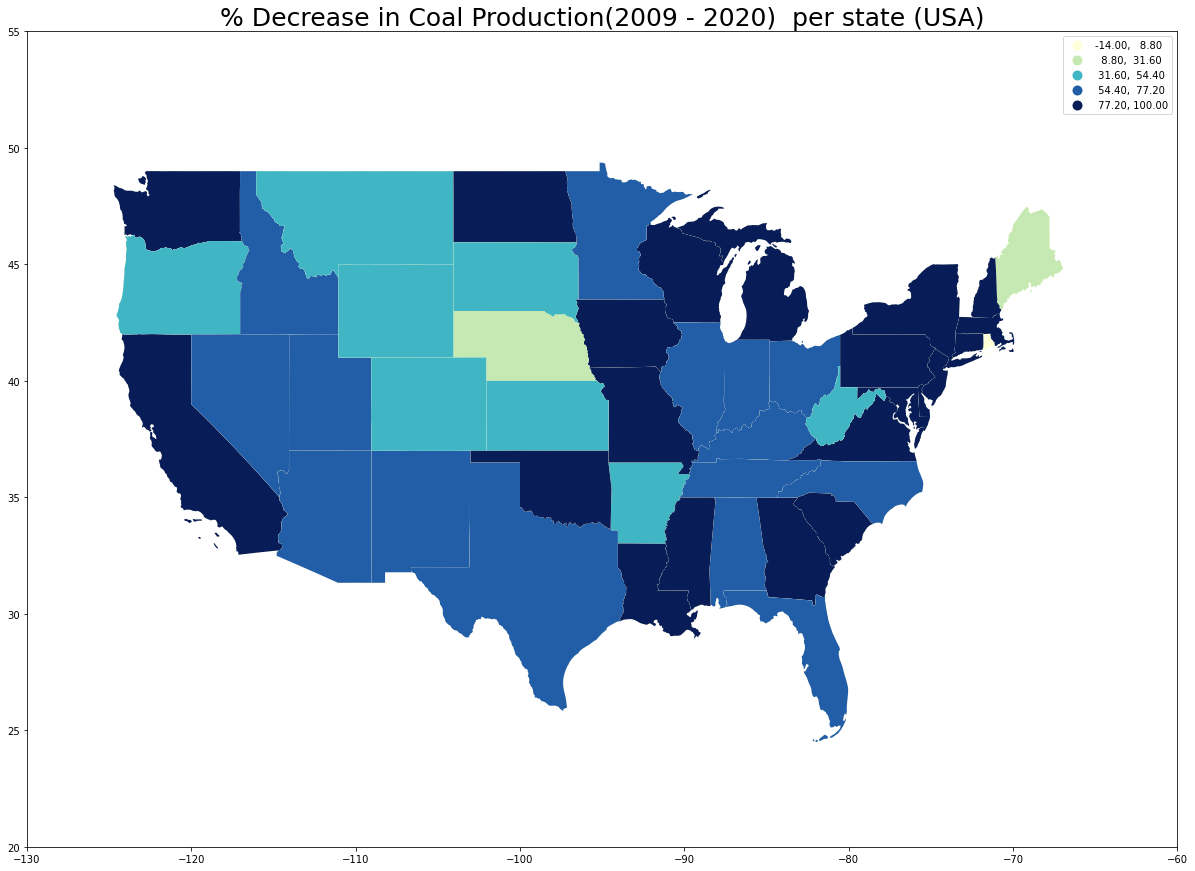

In [244]:
# merge usa_state data and geo_usa shapefile
geo_merge=geo_usa.merge(df_merge,on='NAME')
# plot USA map 
geo_merge.plot(column='Variation', scheme="equal_interval",figsize=(25, 15),legend=True,cmap='YlGnBu')
plt.xlim(-130,-60)
plt.ylim(20,55)
# add countries names and numbers 
#for i in range(len(geo_merge)):
#    plt.text(geo_merge.longitude[i],geo_merge.latitude[i],"{}\n{}".format(geo_merge.NAME[i],geo_merge.Variation[i]),size=10)
plt.title('% Decrease in Coal Production(2009 - 2020)  per state (USA)',fontsize=25)
plt.show()

In [224]:
df_tool = panel.where((panel.Year==2009) | (panel.Year==2020)).dropna()
prod_states = df_tool.groupby(['Year','State']).count()['Plant_Id']
df_tool2 = prod_states.reset_index().set_index('State').groupby('State').pct_change().reset_index()
df_tool2['Variation_%'] = df_tool2.Plant_Id.fillna(0)*100

df_tool2['Variation'] = df_tool2['Variation_%']
df_tool2['NAME'] = df_tool2['State'].apply(lambda x: abbrev_to_us_state[x])
df_tool3 = df_tool2.drop(['Year','Plant_Id','State','Variation_%'],axis=1)
df_tool3['Variation'] = df_tool3['Variation'].apply(lambda x: (-x))

In [225]:
df_merge = df_tool3.join(df_state_loc.set_index('NAME'), on = 'NAME', how = 'left')

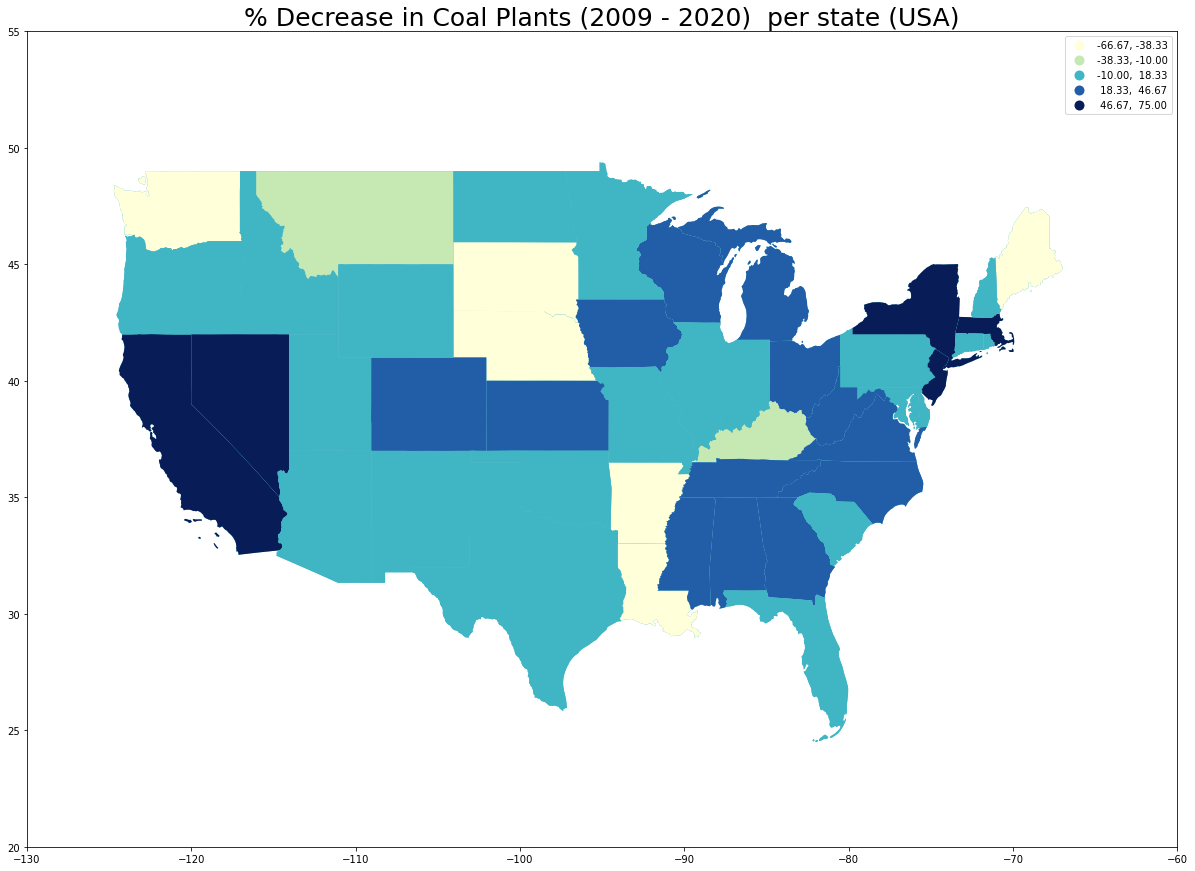

In [226]:
# merge usa_state data and geo_usa shapefile
geo_merge=geo_usa.merge(df_merge,on='NAME')
# plot USA map 
geo_merge.plot(column='Variation', scheme="equal_interval",figsize=(25, 15),legend=True,cmap='YlGnBu')
plt.xlim(-130,-60)
plt.ylim(20,55)
# add countries names and numbers 
#for i in range(len(geo_merge)):
#    plt.text(geo_merge.longitude[i],geo_merge.latitude[i],"{}\n{}".format(geo_merge.NAME[i],geo_merge.Variation[i]),size=10)
plt.title('% Decrease in Coal Plants (2009 - 2020)  per state (USA)',fontsize=25)
plt.show()